# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import ttest_ind_from_stats
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [59]:
medical.shape

(1338, 8)

In [60]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ mean: 13270.42 , standard deviation: 12110.01, count: 1338 <br> The histogram is not a normal distribution and is skewed to the right.

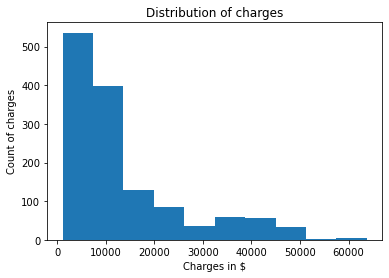

In [61]:
_= plt.hist(medical['charges'])
_= plt.xlabel('Charges in $')
_= plt.ylabel('Count of charges')
_= plt.title('Distribution of charges')
plt.show()

In [62]:
medical['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Although the population is very skewed, the Central Limit Theorem tells us that we can use a Normal model to think about the behavior of the sample means when the sample size is large enough ('charges' having count of 1338). Condition also follows that the data is sampled randomly and that sample values are independent of each other. Thus we can calculate the margin of error and Confidence interval of the mean utilizing t-test.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ The appropriate confidence interval for this case would be one-sided interval as the administrator's concern is to verify whether the average of the charge has fallen below 12,000.

In [63]:
#Setting mean, standard deviation and n of the sample
meanmed = np.mean(medical['charges'])
stdmed = np.std(medical['charges'],ddof=1)
n = len(medical['charges'])

In [64]:
#Calculating through t-score as we do not have standard deviation of the population. We set alpha = 0.05 since it is one-sided interval.
tscore = t.ppf((0.05),(n-1))
tscore

-1.6459941145571324

In [65]:
#Calculating the Margin of Error and 95% Confidence Interval of the mean
margin_error = tscore * (stdmed/np.sqrt(n))
conf_inv_lower = meanmed + margin_error
print("The 95% confidence interval of mean is: {:.2f}".format(conf_inv_lower))

The 95% confidence interval of mean is: 12725.49


__A:__ As per the confidence interval, the true population mean of the charges will be above 12725.49, 95% of the time. <br> Thus, it is highly unlikely that the average charge has fallen below $12,000.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ <br>Null hypothesis: That people with insurance are NOT charged with different amount.<br>
       Alternative hypothesis: That people with insurance are charged with different amount. <br>
       We are making the assumption that Variance is same in both groups and is normally distributed around the group mean.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

## Manual Calculation

In [66]:
#first sepearte the two independent parameters and check for rows
med_seperate = medical[['charges','insuranceclaim']]
med_seperate.head()

,charges,insuranceclaim
0,16884.92400,1
1,1725.55230,1
2,4449.46200,0
3,21984.47061,0
4,3866.85520,1


In [67]:
#find the sample size of insurance claim =0 and =1
n0 = med_seperate['insuranceclaim'].value_counts()[0] #Sample size of Not Insured
n1 = med_seperate['insuranceclaim'].value_counts()[1] #Sample size of Insured

#find the mean
x0 = np.mean(medical['charges'].loc[medical['insuranceclaim']==0])
x1 = np.mean(medical['charges'].loc[medical['insuranceclaim']==1])

#find the standard deviation
s0 = np.std(medical['charges'].loc[medical['insuranceclaim']==0])
s1 = np.std(medical['charges'].loc[medical['insuranceclaim']==1])

In [69]:
#Calculating pooled standard deviation 
sp = np.sqrt(((n0-1)*(s0**2) + (n1-1)*(s1**2))/(n0 + n1 -2))
print("The pooled standard deviation of two groups is: {:.2f}".format(sp))

The pooled standard deviation of two groups is: 11512.28


In [70]:
#Calculating t-test
ttest = (x0 - x1)/(sp*(np.sqrt((1/n0)+(1/n1))))
print("The t-test statistic is: {:.2f}".format(ttest))

The t-test statistic is: -11.90


In [79]:
#Find the probablility from t-distribution of getting absolute t-value greater or equal to 11.90
#Degree of freedom for two sample case is (N1+N2)-2
p_value = t.cdf(ttest,n0+n1-2)*2 #Multiply the p-value with 2 for probability on both sides of the distribution
print("The probability of absolute t-value being greater or equal to 11.90 is:", p_value)

The probability of absolute t-value being greater or equal to 11.90 is: 4.090550214373795e-31


__A:__ The p-value in this situation is very extreme and is nearing zero. This is clearly less than the usual significance level of 0.05.<br>Thus, we can conclude to reject our null hypothesis of NO difference of medical charges between insured/Not insured and suggest that the medical charges are indeed different on the condition of being Insured vs Not Insured

## Calculation with scipy.stats

In [78]:
#From ttest_ind_from_stats(mean1,std1,nobs1,mean2,std2,nobs2,equal_var=True)
ttest_ind_from_stats(x0,s0,n0,x1,s1,n1,equal_var=True)

Ttest_indResult(statistic=-11.901306943555387, pvalue=4.090550214373679e-31)

__A:__ The T-test utilizing the scipy.stats shows exact same numerial results as the manual calculation presented above.

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test